In [3]:
import mne
import numpy as np
import pandas as pd
import pylab as plt

# For parallel processing
import multiprocessing as mp
n_cpus = mp.cpu_count()

# For custom codebase
import sys
sys.path.insert(0, 'C:\\Users\\esolo\\Documents\\Python Scripts\\lib')

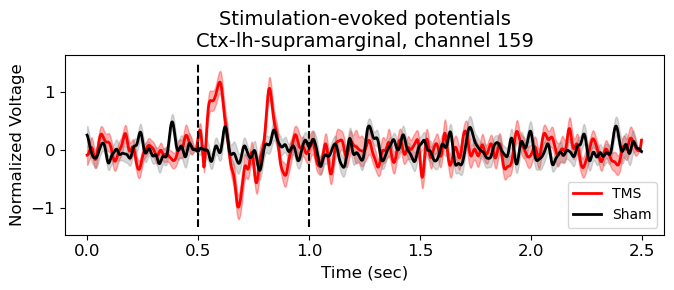

In [8]:
%matplotlib inline

# Set some params
sub = '416'
sess = 'Parietal'
e = 138 # electrode in question
fs = 500 #for all of the downsampled data, sampling rate is 500Hz

# Load the data
tms_dat = np.load('./TMSEEG_data/'+sub+'/'+sub+'_TMS_'+sess+'_0_5Hz_1-CleanedFilteredSubsampled.npy')
sham_dat = np.load('./TMSEEG_data/'+sub+'/'+sub+'_Sham_'+sess+'_0_5Hz_1-CleanedFilteredSubsampled.npy')  # trials x electrodes x samples
elecs = pd.read_pickle('./TMSEEG_data/'+sub+'/'+sub+'_'+sess+'_elecs.pkl')

### Plot the ERP ###
from codebase import normalize_prestim
from scipy.stats import sem

# Normalize values relative to the pre-stim interval
tms_norm = normalize_prestim(tms_dat, samples=250)
sham_norm = normalize_prestim(sham_dat, samples=250)

# Get the ERPs and SEMs
sep_tms_mu = np.mean(tms_norm, 0)
sep_sham_mu = np.mean(sham_norm, 0)
sep_tms_sem = sem(tms_norm, axis=0)
sep_sham_sem = sem(sham_norm, axis=0)

# Plot results
plt.figure(figsize=(7, 3)); ax=plt.subplot(111)
X = np.arange(sep_tms_mu[e, :].size)/fs
plt.fill_between(x = X, y1=sep_tms_mu[e, :]-sep_tms_sem[e, :], 
                 y2 = sep_tms_mu[e, :]+sep_tms_sem[e, :], color='red', alpha=0.3)  #plot the error bars
plt.fill_between(x = X, y1=sep_sham_mu[e, :]-sep_sham_sem[e, :], 
                 y2 = sep_sham_mu[e, :]+sep_sham_sem[e, :], color='gray', alpha=0.3)
plt.plot(X, sep_tms_mu[e, :], color='r', linewidth=2, label='TMS');
plt.plot(X, sep_sham_mu[e, :], color='k', linewidth=2, label='Sham');
plt.vlines([0.5, 1.0], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='k', linestyle='--')
plt.xlim(-0.1,2.6); 
plt.xticks(fontsize=12); plt.yticks(fontsize=12); plt.ylabel('Normalized Voltage', fontsize=12);
plt.xlabel('Time (sec)', fontsize=12)
plt.legend(loc=4)
plt.title('Stimulation-evoked potentials\n'+elecs.iloc[e]['DKT_label']+', channel '+str(elecs['Channel'].iloc[e]), fontsize=14);
plt.tight_layout()


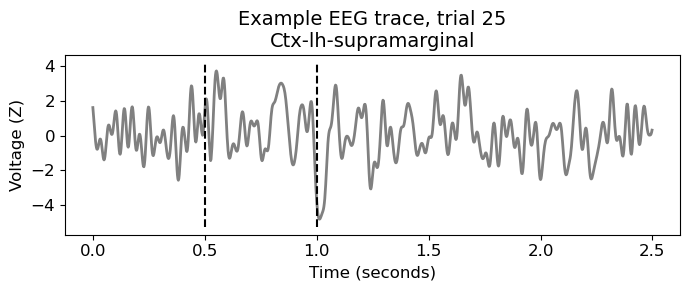

In [9]:
### Plot single-trials examples ###
trial = 25

plt.figure(figsize=(7, 3)); ax=plt.subplot(111)
plt.plot(X, tms_norm[trial, e, :], linewidth=2, color='gray')
plt.vlines([0.5, 1.0], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='k', linestyle='--')
plt.xticks(fontsize=12); plt.yticks(fontsize=12); plt.ylabel('Voltage (Z)', fontsize=12);
plt.xlabel('Time (seconds)', fontsize=12)
plt.title('Example EEG trace, trial '+str(trial)+'\n'+elecs.iloc[e]['DKT_label'], fontsize=14);
plt.tight_layout()

#plt.savefig('./TMSEEG_plots/fig1_example_sham.pdf')